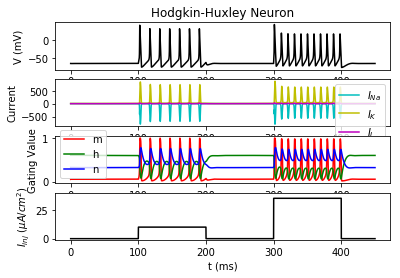

In [26]:
import scipy as sp
import pylab as plt
from scipy.integrate import odeint
import matplotlib.pyplot as plt

class HodgkinHuxley():
    C_m  =   1.0
    g_Na = 120.0
    g_K = 36.0
    g_L  =   0.3
    E_Na =  50.0
    E_K  = -77.0
    E_L  = -54.387
    t = sp.arange(0.0, 450.0, 0.01)
    def alpha_m(self, V):
        return 0.1*(V+40.0)/(1.0 - sp.exp(-(V+40.0) / 10.0))
    def beta_m(self, V):
        return 4.0*sp.exp(-(V+65.0) / 18.0)
    def alpha_h(self, V):
        return 0.07*sp.exp(-(V+65.0) / 20.0)
    def beta_h(self, V):
        return 1.0/(1.0 + sp.exp(-(V+35.0) / 10.0))
    def alpha_n(self, V):
        return 0.01*(V+55.0)/(1.0 - sp.exp(-(V+55.0) / 10.0))
    def beta_n(self, V):
        return 0.125*sp.exp(-(V+65) / 80.0)
    def I_Na(self, V, m, h):
        return self.g_Na * m**3 * h * (V - self.E_Na)
    def I_K(self, V, n):
        return self.g_K  * n**4 * (V - self.E_K)
    def I_L(self, V):
        return self.g_L * (V - self.E_L)
    def I_inj(self, t):
        return 10*(t>100) - 10*(t>200) + 35*(t>300) - 35*(t>400)
    @staticmethod
    def dALLdt(X, t, self):
        V, m, h, n = X
        dVdt = (self.I_inj(t) - self.I_Na(V, m, h) - self.I_K(V, n) - self.I_L(V)) / self.C_m
        dmdt = self.alpha_m(V)*(1.0-m) - self.beta_m(V)*m
        dhdt = self.alpha_h(V)*(1.0-h) - self.beta_h(V)*h
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dmdt, dhdt, dndt
    def Main(self):
        X = odeint(self.dALLdt, [-65, 0.05, 0.6, 0.32], self.t, args=(self,))
        V = X[:,0]
        m = X[:,1]
        h = X[:,2]
        n = X[:,3]
        ina = self.I_Na(V, m, h)
        ik = self.I_K(V, n)
        il = self.I_L(V)
        plt.figure()
        plt.subplot(4,1,1)
        plt.title('Hodgkin-Huxley Neuron')
        plt.plot(self.t, V, 'k')
        plt.ylabel('V (mV)')
        plt.subplot(4,1,2)
        plt.plot(self.t, ina, 'c', label='$I_{Na}$')
        plt.plot(self.t, ik, 'y', label='$I_{K}$')
        plt.plot(self.t, il, 'm', label='$I_{L}$')
        plt.ylabel('Current')
        plt.legend()
        plt.subplot(4,1,3)
        plt.plot(self.t, m, 'r', label='m')
        plt.plot(self.t, h, 'g', label='h')
        plt.plot(self.t, n, 'b', label='n')
        plt.ylabel('Gating Value')
        plt.legend()
        plt.subplot(4,1,4)
        i_inj_values = [self.I_inj(t) for t in self.t]
        plt.plot(self.t, i_inj_values, 'k')
        plt.xlabel('t (ms)')
        plt.ylabel('$I_{inj}$ ($\\mu{A}/cm^2$)')
        plt.ylim(-1, 40)
        plt.show()

c1 = HodgkinHuxley()
c1.Main()